In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir('rossman_csvs')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [3]:
ross_df = pd.read_csv('./rossman_csvs/store.csv', low_memory=False)
train_df = pd.read_csv('./rossman_csvs/train.csv', low_memory=False)
test_df = pd.read_csv('./rossman_csvs/test.csv', low_memory=False)

In [4]:
ross_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
train_df['Sales'].isna().sum()

0

In [7]:
ross_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [8]:
ross_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
ross_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [10]:
merged_df = ross_df.merge(train_df, how='left', on='Store')
merged_test_df = ross_df.merge(test_df, how='left', on='Store')

In [11]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [12]:
merged_df.shape

(1017209, 18)

In [13]:
val_df = merged_df.drop('Sales', axis=1)

In [14]:
val_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,305,1,0,0,1


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [16]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1017209.0,0.50,0.50,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,509178.0,23.27,14.10,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,509178.0,2011.75,1.66,2009.0,2011.0,2012.0,2013.0,2015.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0


In [17]:
merged_df.duplicated().sum()

0

In [18]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'])

In [19]:
time_span = (merged_df.Date.min()- merged_df.Date.max())
def mod(time_span):
    if time_span.days>=0:
        return time_span.days
    else:
        return -time_span.days
time_span=mod(time_span)

In [20]:
time_span

941

## Data Visualisation and exploratory data analysis

<Axes: xlabel='Sales', ylabel='Count'>

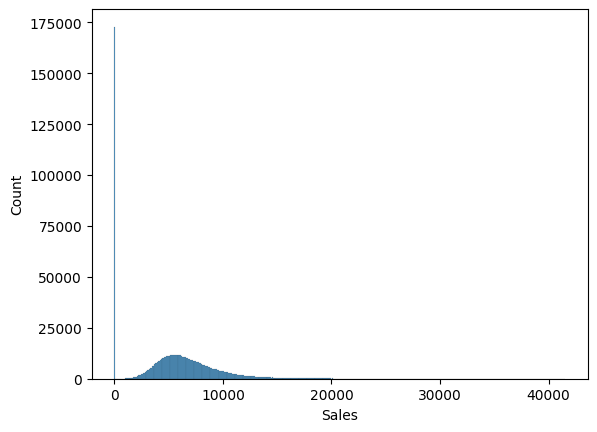

In [21]:
sns.histplot(data=merged_df, x='Sales')

In [22]:
merged_df['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

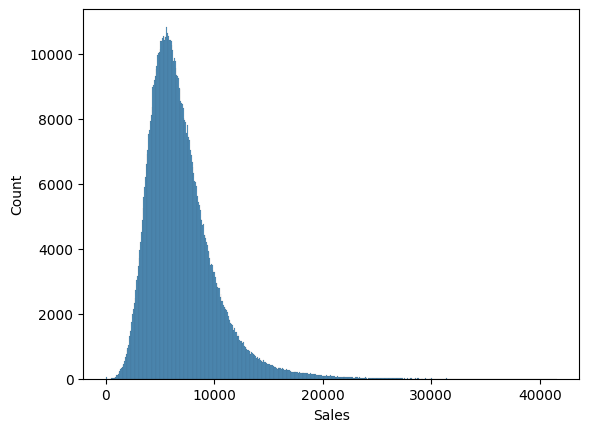

In [23]:
sns.histplot(data=merged_df[merged_df.Open==1], x='Sales')

In [24]:
merged_df['Sales'].value_counts()[0]

172871

In [25]:
merged_df = merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

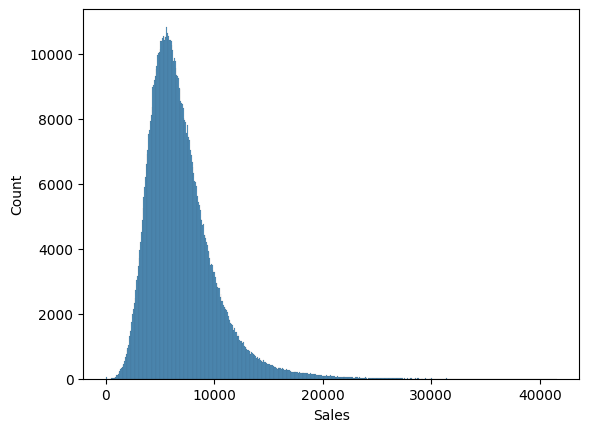

In [26]:
sns.histplot(data=merged_df, x='Sales')

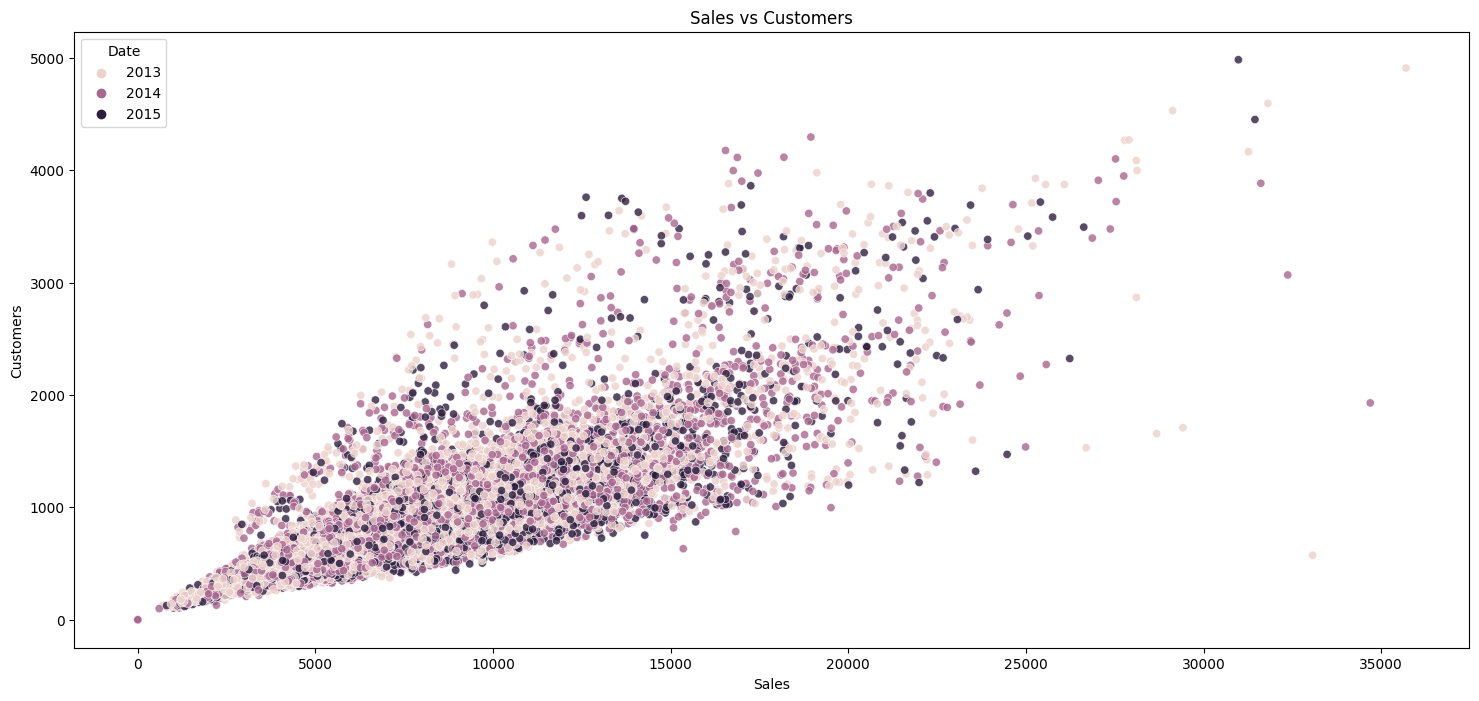

In [27]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y = temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title('Sales vs Customers')
plt.show()

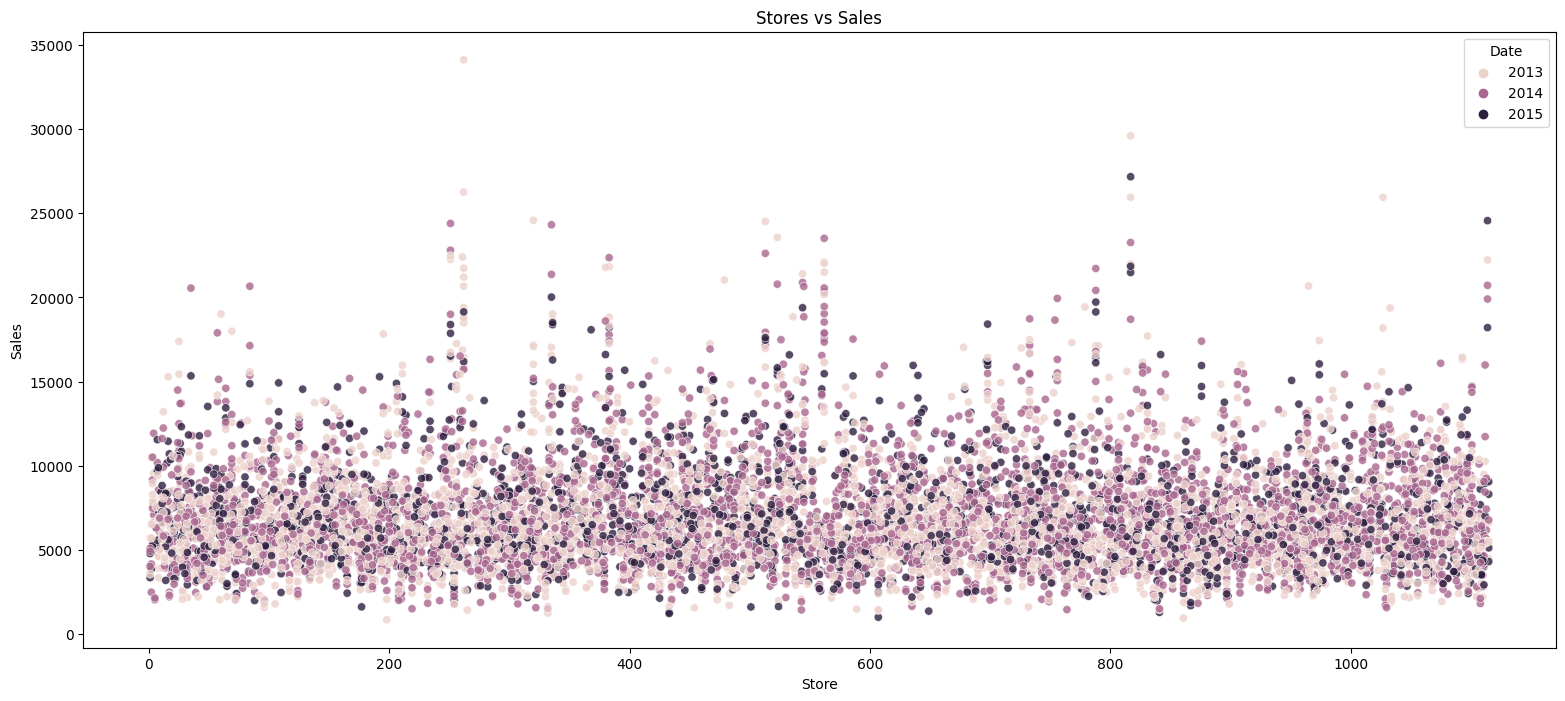

In [28]:
plt.figure(figsize=(19,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df['Store'], y=temp_df['Sales'], hue = temp_df.Date.dt.year, alpha=0.8)
plt.title('Stores vs Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

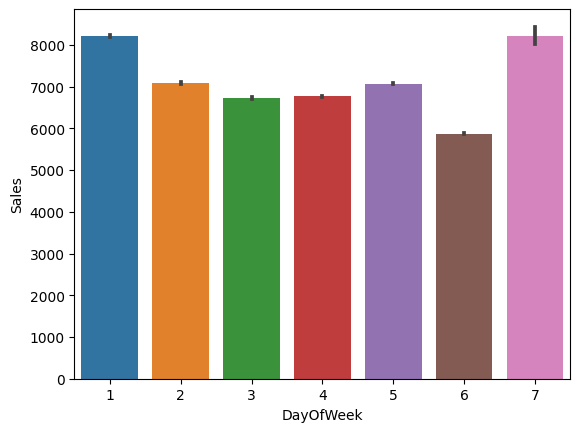

In [29]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

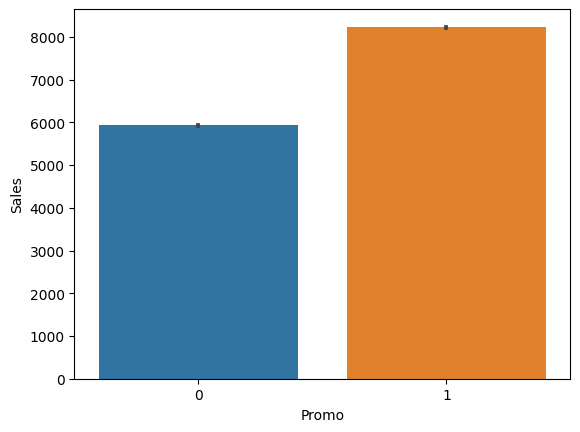

In [30]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [31]:
numerical_cols = merged_df.select_dtypes(include=['float', 'int']).columns

In [32]:
merged_df[numerical_cols].corr(method='pearson')['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

In [33]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,1,0,1
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1


In [34]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [35]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month 
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

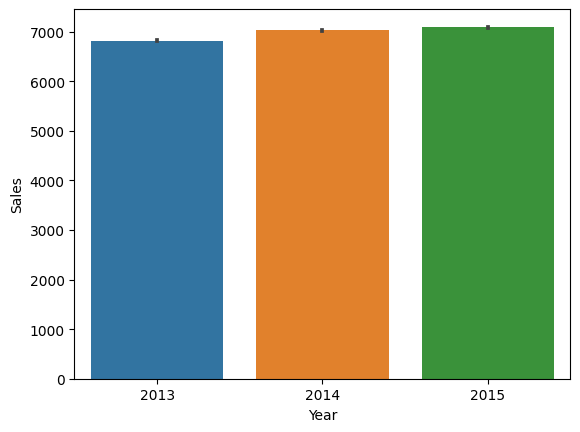

In [36]:
sns.barplot(data=merged_df, x=merged_df.Year, y=merged_df.Sales)

<Axes: xlabel='Month', ylabel='Sales'>

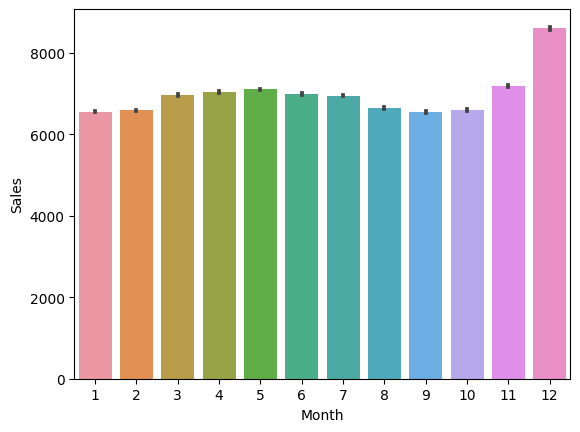

In [37]:
sns.barplot(data=merged_df, x=merged_df.Month, y=merged_df.Sales)

## creating Holiday cols with date

In [38]:
# merged_df['SchoolHoliday'],merged_df.columns

In [39]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-30,5020,546,1,1,0,1,30,7,2015
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-29,4782,523,1,1,0,1,29,7,2015
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-28,5011,560,1,1,0,1,28,7,2015
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-27,6102,612,1,1,0,1,27,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-07,6905,471,1,1,0,1,7,1,2013
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,5,1,2013
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,4,1,2013
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,3,1,2013


In [40]:
promo_col=merged_df.Date[merged_df.Promo==1]

In [41]:
promo_col.min(), promo_col.max()

(Timestamp('2013-01-07 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [42]:
promo_col.min() - promo_col.max()

Timedelta('-935 days +00:00:00')

In [43]:
promo_col.dt.month

0          7
1          7
2          7
3          7
4          7
          ..
1017198    1
1017199    1
1017200    1
1017201    1
1017202    1
Name: Date, Length: 376896, dtype: int32

In [44]:
weather_date={}

In [45]:
weather_date['Year']= promo_col.dt.year
weather_date['month']= promo_col.dt.month
weather_date['days']= promo_col.dt.day

In [46]:
weather_df = pd.DataFrame(weather_date)

In [47]:
weather_df.to_csv('weather_date.csv', index=False)

In [48]:
weather_df['days'].value_counts().sum()

376896

In [49]:
weather_df 

,Year,month,days
0,2015,7,31
1,2015,7,30
2,2015,7,29
3,2015,7,28
4,2015,7,27
...,...,...,...
1017198,2013,1,11
1017199,2013,1,10
1017200,2013,1,9
1017201,2013,1,8


In [50]:
# if you tryna bring weather then the whole thing is gonna be more more complicated because it contains whole eu and it'll as many weather as many shopes it has and data will be large unnesseceraliy

## Creating validation and train,test set

In [51]:
len(merged_df)

844392

In [52]:
train_size = int(0.75 * len(merged_df))

In [53]:
train_size

633294

In [54]:
sorted_df = merged_df.sort_values('Date')
train_df,val_df = sorted_df[:train_size] , sorted_df[train_size:]

In [55]:
len(train_df), len(val_df)

(633294, 211098)

In [56]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [57]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [58]:
train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
615999,676,b,b,1410.0,9.0,2008.0,0,NaN,NaN,NaN,...,2013-01-01,3821,777,1,0,a,1,1,1,2013
667669,733,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,...,2013-01-01,10765,2377,1,0,a,1,1,1,2013
512659,562,b,c,1210.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-01-01,8498,1675,1,0,a,1,1,1,2013
450995,494,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN,...,2013-01-01,3113,527,1,0,a,1,1,1,2013
238339,262,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,...,2013-01-01,17267,2875,1,0,a,1,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597187,656,d,a,410.0,4.0,2009.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2014-12-10,2806,302,1,0,0,0,10,12,2014
411827,452,a,c,1850.0,8.0,2013.0,1,5.0,2011.0,"Feb,May,Aug,Nov",...,2014-12-10,4114,373,1,0,0,0,10,12,2014
906956,995,d,a,6560.0,12.0,2013.0,0,NaN,NaN,NaN,...,2014-12-10,9429,777,1,0,0,0,10,12,2014
973514,1068,d,c,5010.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct",...,2014-12-10,4440,288,1,0,0,0,10,12,2014


## or we can use sklearn to split data randomisely

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_skdf, val_skdf = train_test_split(sorted_df, test_size=0.25, random_state=43)

In [61]:
train_skdf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
395229,434,a,a,13020.0,8.0,2003.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",...,2013-12-17,14037,963,1,1,0,0,17,12,2013
320998,353,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov",...,2014-05-03,4903,1218,1,0,0,0,3,5,2014
230323,254,d,a,330.0,3.0,2008.0,1,1.0,2012.0,"Mar,Jun,Sept,Dec",...,2014-10-27,2252,210,1,0,0,1,27,10,2014
941383,1032,d,c,270.0,2.0,2013.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct",...,2013-02-01,12218,1362,1,0,0,1,1,2,2013
137770,152,a,a,1780.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-09-19,3865,512,1,0,0,0,19,9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825250,906,a,a,90.0,7.0,2010.0,0,NaN,NaN,NaN,...,2014-02-22,7784,1055,1,0,0,0,22,2,2014
87233,96,a,a,8780.0,2.0,2005.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",...,2014-09-15,9154,775,1,1,0,0,15,9,2014
74928,83,a,a,2710.0,NaN,NaN,0,NaN,NaN,NaN,...,2015-05-16,3269,287,1,0,0,0,16,5,2015
483455,530,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN,...,2013-06-14,4160,753,1,0,0,0,14,6,2013


In [62]:
train_df.shape, val_df.shape

((633294, 21), (211098, 21))

In [63]:
train_skdf.shape, val_skdf.shape

((633294, 21), (211098, 21))

## Separate out numerical and categorical columns and target and label columns

In [64]:
target_col = 'Sales'
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year', 'CompetitionDistance']

In [65]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target =  val_df[target_col].copy()

test_inputs =  merged_test_df[input_cols].copy()





trainsk_inputs = train_skdf[input_cols].copy()
trainsk_target = train_skdf[target_col].copy()

valsk_inputs = val_skdf[input_cols].copy()
valsk_target =  val_skdf[target_col].copy()


In [66]:
merged_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Day', 'Month', 'Year'],
      dtype='object')

In [67]:
numerical_col = ['Day','Month', 'Year', 'Store', 'CompetitionDistance']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [68]:
train_inputs[numerical_col]

,Day,Month,Year,Store,CompetitionDistance
615999,1,1,2013,676,1410.0
667669,1,1,2013,733,860.0
512659,1,1,2013,562,1210.0
450995,1,1,2013,494,1260.0
238339,1,1,2013,262,1180.0
...,...,...,...,...,...
597187,10,12,2014,656,410.0
411827,10,12,2014,452,1850.0
906956,10,12,2014,995,6560.0
973514,10,12,2014,1068,5010.0


## Compute missing values

In [69]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [70]:
train_inputs[numerical_col] = imputer.fit_transform(train_inputs[numerical_col])
val_inputs[numerical_col] = imputer.fit_transform(val_inputs[numerical_col])
test_inputs[numerical_col] = imputer.fit_transform(test_inputs[numerical_col])




trainsk_inputs[numerical_col] = imputer.fit_transform(trainsk_inputs[numerical_col])
valsk_inputs[numerical_col] = imputer.fit_transform(valsk_inputs[numerical_col])

In [71]:
val_inputs[numerical_col]

,Day,Month,Year,Store,CompetitionDistance
531181,10.0,12.0,2014.0,583.0,2640.0
131855,10.0,12.0,2014.0,146.0,8050.0
1008390,10.0,12.0,2014.0,1106.0,5330.0
60565,10.0,12.0,2014.0,67.0,410.0
97141,10.0,12.0,2014.0,107.0,1930.0
...,...,...,...,...,...
718008,31.0,7.0,2015.0,789.0,9770.0
248518,31.0,7.0,2015.0,274.0,3640.0
247576,31.0,7.0,2015.0,273.0,8480.0
630704,31.0,7.0,2015.0,693.0,450.0


In [72]:
valsk_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,CompetitionDistance
320114,352.0,4,1,0,d,c,6.0,3.0,2014.0,6360.0
276138,304.0,6,0,0,a,a,20.0,4.0,2013.0,1950.0
784180,861.0,4,0,0,c,c,24.0,7.0,2014.0,740.0
489531,537.0,3,0,0,a,a,14.0,5.0,2014.0,600.0
679182,746.0,1,1,0,d,c,1.0,7.0,2013.0,4330.0
...,...,...,...,...,...,...,...,...,...,...
468866,514.0,2,1,0,c,c,19.0,2.0,2013.0,1200.0
169914,188.0,4,1,0,d,a,9.0,1.0,2014.0,850.0
697497,766.0,4,1,0,d,c,5.0,12.0,2013.0,9820.0
863755,948.0,3,1,0,b,b,8.0,1.0,2014.0,1430.0


## range out our inputs to (0,1)

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
train_inputs[numerical_col] = scaler.fit_transform(train_inputs[numerical_col])
val_inputs[numerical_col] = scaler.fit_transform(val_inputs[numerical_col])
test_inputs[numerical_col] = scaler.fit_transform(test_inputs[numerical_col])

trainsk_inputs[numerical_col] = scaler.fit_transform(trainsk_inputs[numerical_col])
valsk_inputs[numerical_col] = scaler.fit_transform(valsk_inputs[numerical_col])

In [75]:
train_inputs[numerical_col]

,Day,Month,Year,Store,CompetitionDistance
615999,0.0,0.0,0.0,0.605925,0.018328
667669,0.0,0.0,0.0,0.657092,0.011076
512659,0.0,0.0,0.0,0.503591,0.015691
450995,0.0,0.0,0.0,0.442549,0.016350
238339,0.0,0.0,0.0,0.234291,0.015295
...,...,...,...,...,...
597187,0.3,1.0,1.0,0.587971,0.005142
411827,0.3,1.0,1.0,0.404847,0.024130
906956,0.3,1.0,1.0,0.892280,0.086234
973514,0.3,1.0,1.0,0.957810,0.065796


In [76]:
trainsk_inputs[numerical_col]

,Day,Month,Year,Store,CompetitionDistance
395229,0.533333,1.000000,0.0,0.388689,0.171414
320998,0.066667,0.363636,0.5,0.315978,0.011603
230323,0.866667,0.818182,0.5,0.227110,0.004088
941383,0.000000,0.090909,0.0,0.925494,0.003296
137770,0.600000,0.727273,0.0,0.135548,0.023207
...,...,...,...,...,...
825250,0.700000,0.090909,0.5,0.812388,0.000923
87233,0.466667,0.727273,0.5,0.085278,0.115506
74928,0.500000,0.363636,1.0,0.073609,0.035469
483455,0.433333,0.454545,0.0,0.474865,0.239188


## Encoding cols

In [77]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [78]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])




trainsk_inputs[encoded_cols] = encoder.transform(trainsk_inputs[categorical_cols])
valsk_inputs[encoded_cols] = encoder.transform(valsk_inputs[categorical_cols])

In [79]:
X_train = train_inputs[numerical_col+encoded_cols]
X_val = val_inputs[numerical_col+encoded_cols]
X_test = test_inputs[numerical_col + encoded_cols]

## Base line models (to compare it with our intelligence model)

In [80]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true,y_pred)
    return np.sqrt(mse)

In [81]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [82]:
train_preds = return_mean(X_train)

In [83]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [84]:
rmse(train_preds, train_target)

3082.4538262534024

In [85]:
def tanh(x):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.full(len(x),((hi-lo)/(lo+hi))*np.random.random(len(x)))

In [86]:
train_preds = tanh(X_train)

In [87]:
rmse(train_preds, train_target)

7531.825782676138

## Linear Regression Models

In [88]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, train_target)

In [89]:
train_preds = linreg.predict(X_train)

In [90]:
train_preds

array([ 7128.,  7142., 11442., ...,  5269.,  6070.,  6437.])

In [91]:
rmse(train_preds, train_target)

2738.8708854238675

In [92]:
val_preds = linreg.predict(X_val)

In [93]:
rmse(val_preds, val_target)

2826.5729034589303

In [94]:
def try_model(model):
    model.fit(X_train,train_target)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = rmse(train_preds, train_target)
    val_rmse = rmse(val_preds, val_target)
    
    return {f"model: {model} train rmse: {round(train_rmse,2)}, val rmse: {round(val_rmse, 2)}"}

In [95]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, ElasticNet, LinearRegression

In [96]:
models = [Ridge(), Lasso() , SGDRegressor() , ElasticNet() , LinearRegression()]

In [97]:
for x in models:
    print(try_model(x))

{'model: Ridge() train rmse: 2738.87, val rmse: 2826.55'}
{'model: Lasso() train rmse: 2739.04, val rmse: 2826.42'}
{'model: SGDRegressor() train rmse: 2739.58, val rmse: 2834.38'}
{'model: ElasticNet() train rmse: 2878.91, val rmse: 2976.13'}
{'model: LinearRegression() train rmse: 2738.87, val rmse: 2826.57'}


## Tree Based Models

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [99]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

{'model: DecisionTreeRegressor(random_state=42) train rmse: 0.0, val rmse: 1534.21'}

[Text(0.5, 0.9, 'Promo_1 <= 0.5\nsquared_error = 9494741.684\nsamples = 633294\nvalue = 6873.174'),
 Text(0.25, 0.7, 'StoreType_b <= 0.5\nsquared_error = 6681057.716\nsamples = 352553\nvalue = 5848.367'),
 Text(0.125, 0.5, 'Assortment_c <= 0.5\nsquared_error = 6056562.372\nsamples = 345345\nvalue = 5774.681'),
 Text(0.0625, 0.3, 'CompetitionDistance <= 0.003\nsquared_error = 5289541.774\nsamples = 182382\nvalue = 5438.933'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'CompetitionDistance <= 0.004\nsquared_error = 6647631.266\nsamples = 162963\nvalue = 6150.437'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'CompetitionDistance <= 0.016\nsquared_error = 23877531.412\nsamples = 7208\nvalue = 9378.778'),
 Text(0.3125, 0.3, 'CompetitionDistance <= 0.013\nsquared_error = 27686916.059\nsamples = 4602\nvalue = 10768.409'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  

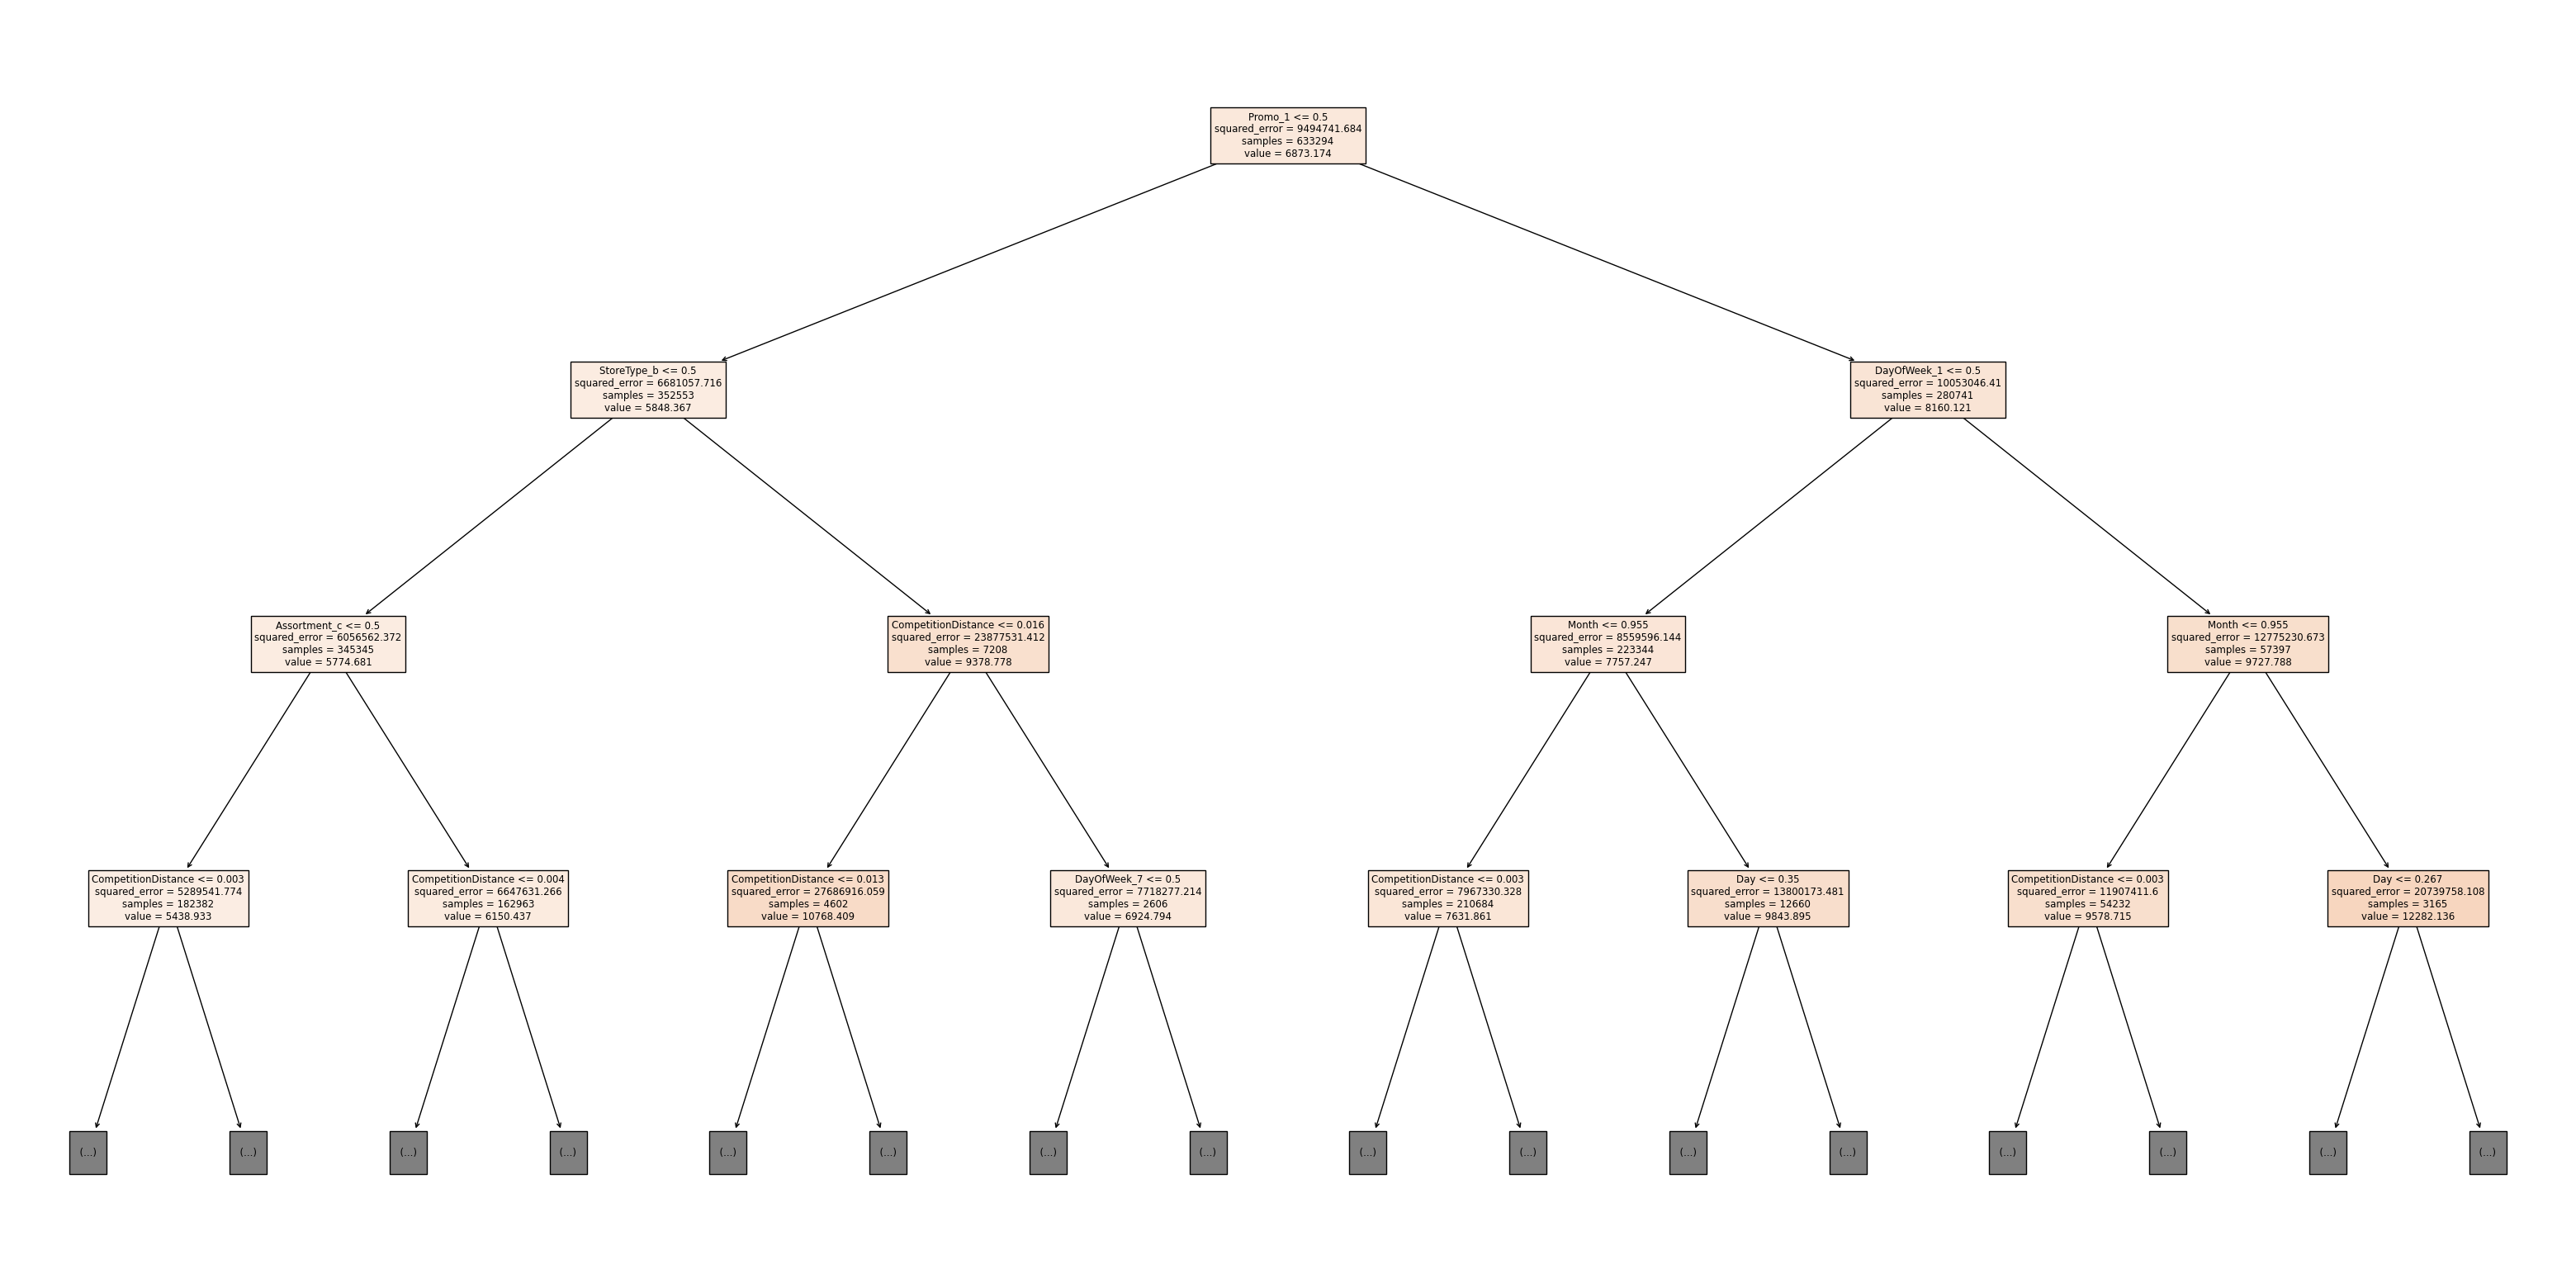

In [100]:
plt.figure(figsize=(40,20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numerical_col+encoded_cols)

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=50, max_depth=50)

CPU times: user 26 µs, sys: 8 µs, total: 34 µs
Wall time: 36 µs


In [103]:
try_model(rf)

{'model: RandomForestRegressor(max_depth=50, n_estimators=50, n_jobs=-1, random_state=42) train rmse: 403.75, val rmse: 1332.42'}

In [104]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [105]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [106]:
def max_depth(x):
    tree = DecisionTreeRegressor(random_state=42, max_depth=x)
    return try_model(tree)

In [107]:
# error_df = [max_depth(x) for x in range(1,50)]

In [108]:
# error_df

NameError: name 'error_df' is not defined

## Build a Basic Neural NetWork 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train.shape

In [ ]:
# model = keras.Sequential([
# #     keras.layers.Flatten(input_shape=(other than 2dim tensor use that)),
# #     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(25, activation='linear'),
# #     keras.layers.Dense(5, activation='linear'),
#     keras.layers.Dense(1, activation='linear'),
# ])

# model.compile(optimizer='RMSProp',
#              loss='mean_squared_error',
#              metrics=['accuracy'])
# model.fit(X_train, train_target, epochs=5)

In [ ]:
# model.evaluate(X_val, val_target)

## KFold Algorithm 

In [109]:
from sklearn.model_selection import KFold,cross_val_score

In [110]:
kf = KFold(n_splits=10)

In [111]:
kf.get_n_splits(X_train)

10

In [ ]:
scores = cross_val_score(rf,X_train, train_target, cv=kf)

In [ ]:
print(f"cross validation scores : {scores}")

In [1]:
test_preds.shape

NameError: name 'test_preds' is not defined